<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
#### **Студент(ка):** ✅ Привет! Рада познакомиться! Спасибо за ревью и много комментариев!

## Ревью v. 2:

Молодец, что внесла исправления в проект. Ты провела отличный анализ и выводы хорошо проработаны.

Поздравляю, проект принят:)

Успехов!

# Проект: Исследование стартапов

## Введение

Цель проекта - провести исследование инвестиционного рынка на исторических данных. Анализ проводится с целью предоставления отчета для финансовой компании, занимающейся покупкой и перепродажей стартапов. Также необходимо выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка



In [ ]:
# Импортируем библиотеки
import pandas as pd
import warnings
# import jupyter_black

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
try:
    import phik
except ModuleNotFoundError as e:
    !pip install phik
    print("Error was:", e)


In [2]:
# Общие настройки блокнота
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Настройки для повышения читаемости
pd.set_option('display.expand_frame_repr', False)

# Общие настройки для графиков
large = 16
med = 12
small = 10

params = {
    "axes.titlesize": large,
    "legend.fontsize": med,
    "figure.figsize": (12, 8),
    "axes.labelsize": med,
    "axes.titlesize": med,
    "xtick.labelsize": med,
    "ytick.labelsize": med,
    "figure.titlesize": large,
}

plt.rcParams.update(params)

# Получаем цвета из палитры Seaborn
palette = sns.color_palette("viridis")

# Устанавливаем цвета для всех графиков Matplotlib
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=palette)

warnings.filterwarnings("ignore")


In [3]:
# Выгружаем датасеты

acq_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

### Описание данных




1. `acquisition` - содержит информацию о покупках одними компаниями других компаний
    - id — идентификатор покупки.
    - acquiring_company_id — идентификатор покупающей компании.
    - acquired_company_id — идентификатор покупаемой компании.
    - term_code — варианты расчёта.
    - price_amount — сумма сделки.
    - acquired_at — дата сделки.

2. `education` - содержит информацию об образовании сотрудника
    - id — идентификатор записи об образовании.
    - person_id — идентификатор работника.
    - instituition — название учебного заведения.
    - graduated_at — дата получения образования.

3. `people` - содержит информацию о сотрудниках
    - id — идентификатор сотрудника.
    - first_name — имя сотрудника.
    - last_name — фамилия сотрудника.
    - company_id — идентификатор компании.
    - network_username — ник в социальных сетях.

4. `degrees` - содержит информацию о типе образования сотрудника
    - id — идентификатор записи.
    - object_id — идентификатор сотрудника.
    - degree_type — тип образования.
    - subject — специальность.

5. `company_and_rounds` - содержит информацию о компаниях и раундах финансирования
    - company ID — идентификатор компании.
    - name — название компании.
    - category code — категория области деятельности компании.
    - status — статус компании.
    - founded at — дата инвестирования.
    - closed at — дата закрытия компании.
    - domain — официальный сайт компании.
    - network username — ник компании в сети.
    - country code — код страны компании.
    - investment rounds — число инвестиционных раундов.
    - funding rounds — число раундов финансирования.
    - funding total — сумма финансирования.
    - milestones — вехи финансирования.
    - funding round id — идентификатор этапа финансирования.
    - company id — идентификатор компании.
    - funded at — дата финансирования.
    - funding round type — тип финансирования.
    - raised amount — сумма финансирования.
    - pre money valuation — предварительная денежная оценка.
    - participants — число участников.
    - is first round — является ли раунд первым.
    - is last round — является раунд последним.


**Эти таблицы не требуются для выполнения проекта, но связаны с исследуемыми данными:**

6. `fund` - содержит информацию о фондах
    - id — идентификатор фонда.
    - name — название фонда.
    - category_code — категория области деятельности компании.
    - founded_at — дата создания фонда.
    - domain — сайт фонда.
    - network_username — ник фонда в сети.
    - country_code — код страны фонда.
    - investment_rounds — число инвестиционных раундов.
    - invested_companies — число профинансированных компаний.
    - milestones — вехи финансирования.

7. `investment` - содержит информацию о раундах инвестирования
    - id — идентификатор этапа инвестирования.
    - funding_round_id — идентификатор раунда инвестирования.
    - company_id — индентификатор компании.
    - funding_round_type — тип финансирования.
    - fund_id — идентификатор фонда.




### 1.1. Вывод общей информации, исправление названия столбцов

Пропишем функцию для автоматизации проверки всех датасетов на основную информацию.

In [4]:
def lookup_datasets(dfs, filenames=None):
    """
    Выводит информацию о датасетах из списка

    Parameters:
        dfs (list of pd.DataFrame): Список датафреймов для обработки.
        filenames (list of str): Список названий файлов (имена для отображения).
    """
    # Если имена не указаны, генерируем их автоматически
    if filenames is None:
        filenames = [f"df_{i + 1}" for i in range(len(dfs))]

    # Установка параметров для полного отображения таблиц
    pd.set_option('display.max_rows', None)  # Показывать все строки
    pd.set_option('display.max_columns', None)  # Показывать все столбцы
    pd.set_option('display.width', 1000)  # Ширина отображения
    pd.set_option('display.max_colwidth', None)  # Полная ширина значений в ячейках

    for df, df_name in zip(dfs, filenames):
        print('-'*10, ' '*5, df_name, ' '*5, '-'*10)

        # Пропущенные значения
        missing_data = df.isna().mean()
        missing_data_result = missing_data.apply(lambda x: f'{x:.2%}')
        missing_data_result.name = "Пропущено (%)"

        # Типы данных
        dtypes_result = df.dtypes
        dtypes_result.name = "Тип данных колонки"

        # Поиск строки с минимальным количеством пропущенных значений
        fewest_nans_row = df.isna().sum(axis=1).idxmin()
        values_type = df.iloc[fewest_nans_row].map(type)
        values_type.name = "Тип значения"

        # Объединяем результаты и пример данных
        result = pd.concat([
            dtypes_result,  # Типы данных
            values_type,  # Типы значений
            missing_data_result,  # Пропущенные значения
            df.iloc[0, :].rename("Первая строка"),  # Первая строка
            df.iloc[fewest_nans_row].rename("Строка с минимум NaN"),  # Строка с минимум NaN
            df.iloc[-1, :].rename("Последняя строка")  # Последняя строка
        ], axis=1)

        # Заполняем NaN пробелами для удобства чтения
        result = result.fillna(" ")

        display(result)

        # Проверка на полные дубликаты
        duplicates = df.duplicated().mean()
        if duplicates > 0:
            print(f'Полных дубликатов: {duplicates:.2%}')

        print()

    # Возвращаем настройки pandas в исходное состояние
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.max_colwidth')


**acq_df**

In [5]:
# Проводим автоматический осмотр данных
lookup_datasets([acq_df])

----------       df_1       ----------


,Тип данных колонки,Тип значения,Пропущено (%),Первая строка,Строка с минимум NaN,Последняя строка
id,int64,<class 'numpy.int64'>,0.00%,1,7,10529
acquiring_company_id,int64,<class 'numpy.int64'>,0.00%,11,59,53
acquired_company_id,int64,<class 'numpy.int64'>,0.00%,10,72,92846
term_code,object,<class 'str'>,80.54%,,cash,
price_amount,int64,<class 'numpy.int64'>,0.00%,20000000,60000000,42600000
acquired_at,object,<class 'str'>,0.31%,2007-05-30,2007-07-01,2013-12-12


In [6]:
display(acq_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


None

Датасет содержит 6 столбцов и 9407 строк. Пропуски содержатся в столбцах term_code (способ расчета - 80%) и acquired_at (дата сделки - 0.31%). Дату расчета нужно перевести в формат datetime и снизить разрядность остальных числовых столбцов.

**company_df**

In [7]:
# Проводим автоматический осмотр данных
lookup_datasets([company_df])

----------       df_1       ----------


,Тип данных колонки,Тип значения,Пропущено (%),Первая строка,Строка с минимум NaN,Последняя строка
company ID,float64,<class 'numpy.float64'>,0.14%,1.00,1006.00,
name,object,<class 'str'>,0.14%,Wetpaint,Youlicit,
category code,object,<class 'str'>,33.93%,web,web,
status,object,<class 'str'>,0.14%,operating,closed,
founded at,object,<class 'str'>,49.51%,2005-10-17,2006-09-01,
closed at,object,<class 'str'>,98.42%,,2010-05-22,
domain,object,<class 'str'>,32.43%,wetpaint-inc.com,youlicit.com,
network username,object,<class 'str'>,56.13%,BachelrWetpaint,youlicit,
country code,object,<class 'str'>,50.13%,USA,USA,
investment rounds,float64,<class 'numpy.float64'>,0.14%,0.00,0.00,


In [8]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датасет содержит 22 столбца и 217774 строки.

Пропуски содержатся в каждом столбце, даже в столбце с ID компании. Пока можно сказать, что есть блоки данных, разбросанные по разным столбцам, возможно это результат объединения двух датасетов, отсюда и пропуски по части компаний.

Следует также проверить информацию на дублирование, поскольку несколько столбцов повторяются ("company  ID", "company  id" и т.д.). Столбцы с 13 по 21 содержат одинаковое количество строк, значит все они содержат данные об одном и том же типе компаний.

Что касается типов данных, то здесь тоже следует перевести столбцы с датами в datetime. При заполнении пропусков возможно получится перевести некоторые столбцы с целочисленных тип данных. Также понизим разрядность везде, где это возможно.

Здесь же исправим названия столбцов, приведя их в единый регистр и стиль snake case.

In [9]:
# Приведем названия столбцов в нижний регистр и к стилю snake case
company_df.columns = company_df.columns.str.lower().str.replace('  ', '_')
cols = company_df.columns.tolist()
# Переименуем повторяющийся столбец
cols[-8] = 'company_id_f'
company_df.columns = cols
display(company_df.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_f', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

**degrees_df**

In [10]:
# Проводим автоматический осмотр данных
lookup_datasets([degrees_df])

----------       df_1       ----------


,Тип данных колонки,Тип значения,Пропущено (%),Первая строка,Строка с минимум NaN,Последняя строка
id,int64,<class 'numpy.int64'>,0.00%,1,2,109610
object_id,object,<class 'str'>,0.00%,p:6117,p:6136,p:268528
degree_type,object,<class 'str'>,10.24%,MBA,BA,J.D.
subject,object,<class 'str'>,25.83%,,"English, French",


In [11]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет содержит 4 столбца и 109610 строк. Типы данных корректные, только понизим разрядность. Пропуски содержатся в столбцах degree_type (тип образования - 10,24%) и subject (специальность - 26%).

**education_df**

In [12]:
# Проводим автоматический осмотр данных
lookup_datasets([education_df])

----------       df_1       ----------


,Тип данных колонки,Тип значения,Пропущено (%),Первая строка,Строка с минимум NaN,Последняя строка
id,int64,<class 'numpy.int64'>,0.00%,1,2,109610
person_id,int64,<class 'numpy.int64'>,0.00%,6117,6136,268528
instituition,object,<class 'str'>,0.05%,,"Washington University, St. Louis",University of San Diego School of Law
graduated_at,object,<class 'str'>,47.04%,,1990-01-01,


In [13]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датасет содержит 4 столбца и 109610 строк. Эту таблицу можно смело объединять с предыдущей, чтобы данные об образовании были полными и содержались в одном месте. Пропуски содержатся в столбцах instituition и graduated_at. Столбец graduated_at можно перевести во временной формат.

**fund_df**

In [14]:
# Проводим автоматический осмотр данных
lookup_datasets([fund_df])

----------       df_1       ----------


,Тип данных колонки,Тип значения,Пропущено (%),Первая строка,Строка с минимум NaN,Последняя строка
id,int64,<class 'numpy.int64'>,0.00%,13131,1,2553
name,object,<class 'str'>,0.03%,,Greylock Partners,fbFund
founded_at,object,<class 'str'>,60.48%,,1965-01-01,
domain,object,<class 'str'>,36.82%,,greylock.com,developers.socialnet.com::fbfund.php
network_username,object,<class 'str'>,81.56%,,greylockvc,fbFund
country_code,object,<class 'str'>,39.47%,,USA,
investment_rounds,int64,<class 'numpy.int64'>,0.00%,0,307,23
invested_companies,int64,<class 'numpy.int64'>,0.00%,0,196,21
milestones,int64,<class 'numpy.int64'>,0.00%,0,0,2


In [15]:
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


Датасет содержит 9 столбцов и 11652 строк. Пропуски содержатся в столбах founded_at 60%, domain 36%, network_username 81%, country_code 39%. Столбец founded_at можно перевести во временной формат.

**investment_df**

In [16]:
# Проводим автоматический осмотр данных
lookup_datasets([investment_df])


----------       df_1       ----------


,Тип данных колонки,Тип значения,Пропущено (%),Первая строка,Строка с минимум NaN,Последняя строка
id,int64,<class 'int'>,0.00%,1,1,61403
funding_round_id,int64,<class 'int'>,0.00%,1,1,57948
company_id,int64,<class 'int'>,0.00%,4,4,211890
fund_id,int64,<class 'int'>,0.00%,1,1,2101


In [17]:
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


Содержит 61403 строки и 4 столбца. Пропусков нет. Тип данных корректен.

**people_df**

In [18]:
# Проводим автоматический осмотр данных
lookup_datasets([people_df])


----------       df_1       ----------


,Тип данных колонки,Тип значения,Пропущено (%),Первая строка,Строка с минимум NaN,Последняя строка
id,int64,<class 'numpy.int64'>,0.00%,10,100006,178190
first_name,object,<class 'str'>,0.00%,Mark,Courtney,Alex
last_name,object,<class 'str'>,0.00%,Zuckerberg,Homer,Smith
company_id,float64,<class 'numpy.float64'>,84.73%,5.00,81558.00,
network_username,object,<class 'str'>,82.86%,,jobsbostontech,esocialnetlike


In [19]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Содержит 5 столбцов и 226709 строк.

Пропуски содержатся в столбцах first_name 9 штук, last_name 4 штуки, company_id 84%, network_username 82%. Типы данных корректные.

#### Промежуточный вывод

Почти во всех датафреймах требуется привести столбцы к временному типу данных. Много где есть значительное количество пропусков. При этом имена столбцов не нуждаются в изменении (кроме датафрейма company_df, где названия мы уже исправили), а данные в столбцах соответствуют своему описанию.

### 1.2. Смена типов и анализ пропусков

* **Типы данных**

In [20]:
# Сменим тип данных на временной во всех датафреймах
acq_df['acquired_at'] = pd.to_datetime(acq_df['acquired_at'])
company_df['founded_at'] = pd.to_datetime(company_df['founded_at'])
company_df['closed_at'] = pd.to_datetime(company_df['closed_at'])
company_df['funded_at'] = pd.to_datetime(company_df['funded_at'])
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'])
fund_df['founded_at'] = pd.to_datetime(fund_df['founded_at'])

In [21]:
# Оптимизируем целочисленный тип данных в датафрейме acq_df
for column in ['id','acquiring_company_id','acquired_company_id',
               'price_amount']:
    acq_df[column] = pd.to_numeric(acq_df[column],
                                    downcast='integer')

In [22]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [23]:
# Оптимизируем вещественный тип данных в датафрейме company_df
for column in ['company_id','investment_rounds','funding_rounds',
               'funding_total', 'milestones', 'funding_round_id',
               'company_id_f', 'raised_amount',
               'pre_money_valuation', 'participants',
               'is_first_round', 'is_last_round']:
    company_df[column] = pd.to_numeric(company_df[column],
                                    downcast='float')

In [24]:
# Оптимизируем целочисленный тип данных в датасете degrees_df
degrees_df['id'] = pd.to_numeric(degrees_df['id'], downcast='integer')

In [25]:
# Оптимизируем целочисленный тип данных в датафрейме education_df
for column in ['id','person_id']:
    education_df[column] = pd.to_numeric(education_df[column],
                                    downcast='integer')

In [26]:
# Оптимизируем целочисленный тип данных в датафрейме fund_df
for column in ['id','investment_rounds',
               'invested_companies', 'milestones']:
    fund_df[column] = pd.to_numeric(fund_df[column],
                                    downcast='integer')

In [27]:
# Оптимизируем целочисленный тип данных в датафрейме investment_df
for column in ['id','funding_round_id',
               'company_id', 'fund_id']:
    investment_df[column] = pd.to_numeric(investment_df[column],
                                    downcast='integer')

* **Дубликаты**

In [28]:
# Проверяем полные дубликаты 
company_df.duplicated().sum()

np.int64(0)

In [29]:
# Проверяем полные дубликаты 
acq_df.duplicated().sum()

np.int64(0)

In [30]:
# Проверяем полные дубликаты 
degrees_df.duplicated().sum()

np.int64(0)

In [31]:
# Проверяем полные дубликаты 
education_df.duplicated().sum()

np.int64(0)

In [32]:
# Проверяем полные дубликаты 
fund_df.duplicated().sum()

np.int64(0)


* **Пропуски**

Пропуски содержатся почти в каждом датафрейме.

- `acq_df`: в столбце term_code с вариантами расчета и acquired_at с датой сделки.
- `degrees_df`: в столбцах degree_type и subject с информацией об образовании.
- `education_df`: в столбцах instituition и graduated_at - информация об образовании.
- `fund_df`: столбцы founded_at, domain, network_username, country_code.
- `company_df` - детефрейм с основной информацией для анализа, будет проанализирован далее подробно далее.

In [33]:
# Посмотрим количество и процент пропусков
display(company_df.isna().sum())
display(company_df.isna().mean()*100)

company_id                302
name                      303
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id_f           164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

company_id             0.14
name                   0.14
category_code         33.93
status                 0.14
founded_at            49.51
closed_at             98.42
domain                32.43
network_username      56.13
country_code          50.13
investment_rounds      0.14
funding_rounds         0.14
funding_total          0.14
milestones             0.14
funding_round_id      75.70
company_id_f          75.70
funded_at             75.81
funding_round_type    75.70
raised_amount         75.70
pre_money_valuation   75.70
participants          75.70
is_first_round        75.70
is_last_round         75.70
dtype: float64

In [34]:
# Построим матрицу корреляции для анализа пропусков
missing_indicator = company_df.isnull().astype(int)
correlation_matrix = missing_indicator.corr()

In [35]:
# Проверим корреляцию столбца category_code с другими данными
category_code_missing = missing_indicator["category_code"]

category_code_correlation = missing_indicator.corrwith(category_code_missing)

category_code_correlation_sorted = category_code_correlation.sort_values(ascending=False)
category_code_correlation_sorted

category_code         1.00
domain                0.87
founded_at            0.67
country_code          0.58
network_username      0.57
funding_round_id      0.37
is_first_round        0.37
participants          0.37
is_last_round         0.37
company_id_f          0.37
pre_money_valuation   0.37
raised_amount         0.37
funding_round_type    0.37
funded_at             0.37
closed_at             0.08
name                  0.05
status                0.05
company_id            0.05
milestones            0.05
funding_total         0.05
funding_rounds        0.05
investment_rounds     0.05
dtype: float64

Столбцы с `funding_round_id` по `is_last_round` имеют одинаковое количество пропусков. Здесь содержится информация о раундах финансирования. Получается, что 75% компаний не привлекали финансирование. Это важная информация, заполнять эти пропуски мы не будем. Эти пропуски относятся к типу MAR, поскольку зависят от других наблюдаемых данных. Вероятнее всего, пропуски здесь - это результат объединения двух датафреймов, в одном из которых была информация только о части компаний.

Столбец `category_code` содержит 33% пропусков и здесь содержится информация о категории области деятельности компании. Возможно, не все компании имеют категорию области деятельности либо данные не полные. Эти пропуски относятся к категории MAR, поскольку имеют корреляцию с другими столбцами и не выглядят случайными (MCAR), и скорее всего не обусловлены самой категорией компании (MNAR).

Столбец `founded_at` содержит 49% пропусков. Здесь содержится информация о дате первого финансирования компании, то есть ее открытия.

Столбец `closed_at` содержит 98% пропусков. Видимо, такие данные есть только у закрытых компаний.

Столбец `domain` имеет 32% пропусков, столбец `network_username` - 56%. Здесь содержится информация об официальном сайте компании и ее нике, для исследования она не важна. `country_code` - код страны компании - содержит 50% пропусков. Это тоже MAR пропуски.


**Вывод:**

Судя по матрице корреляции, пропуски в первой части датафрема (до столбца funding_round_id) связаны с отсутствием домена, а также с годом основания компании и определенными странами. Что же касается второй части исследуемых данных, то это присоединенный позже датасет, в котором есть информация не по всем компаниям.


## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [36]:
# Выделяем год финансирования
company_df['funded_at_years'] = company_df['funded_at'].dt.to_period('Y')
# Строим сводную таблицу
pivot_years = pd.pivot_table(company_df,
                             index='funded_at_years',
                             values='raised_amount',
                             aggfunc=['sum', 'median', 'count']).round(2)
pivot_years.columns = ['sum_raised_amount', 'median_raised_amount', 'count_raised_amount']
# Фильтруем результаты
pivot_years = pivot_years[pivot_years['count_raised_amount'] > 50]
pivot_years = pivot_years.reset_index()
display(pivot_years)

,funded_at_years,sum_raised_amount,median_raised_amount,count_raised_amount
0,1999,563938370.00,2000000.00,76
1,2000,1435688643.00,4200000.00,125
2,2001,841105820.00,3000000.00,96
3,2002,908998728.00,4200000.00,116
4,2003,910282885.00,3000000.00,159
5,2004,2209750846.00,5000000.00,291
6,2005,15227523397.00,5500000.00,1633
7,2006,20472795394.00,5000000.00,2436
8,2007,29285058454.00,3973320.00,3279
9,2008,38463868468.00,3110000.00,3774


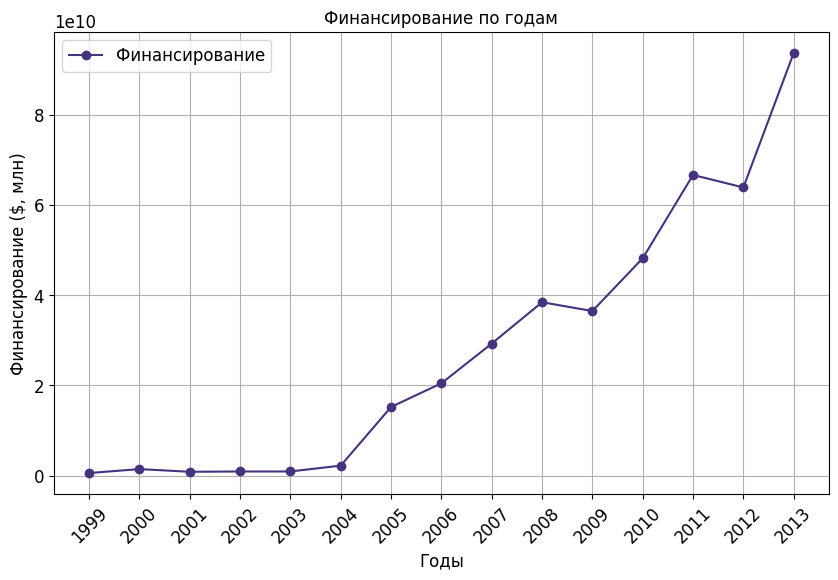

In [37]:
# Убедимся, что funded_at_years в формате datetime для корректной работы с графиком
pivot_years['funded_at_years'] = pivot_years['funded_at_years'].astype(str)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(pivot_years['funded_at_years'],
         pivot_years['sum_raised_amount'],
         marker='o',
         label='Финансирование')

# Настройка графика
plt.title("Финансирование по годам")
plt.xlabel("Годы")
plt.ylabel("Финансирование ($, млн)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()


# Показ графика
plt.show()


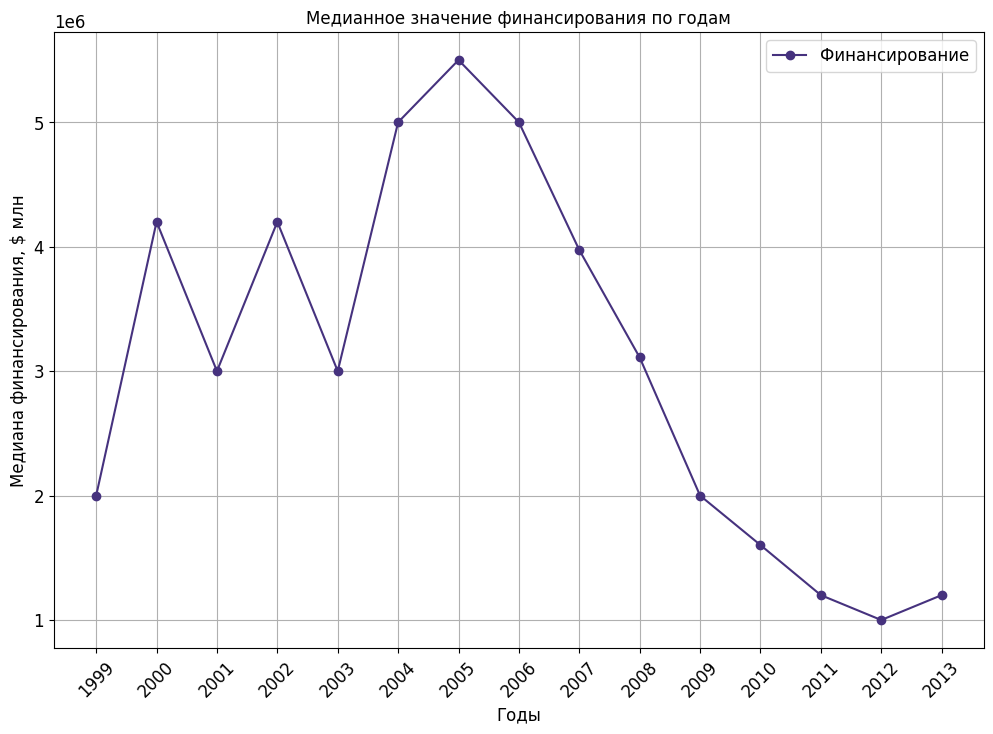

In [38]:
plt.plot(pivot_years['funded_at_years'],
         pivot_years['median_raised_amount'],
         marker='o',
         label='Финансирование')
plt.ylabel('Медиана финансирования, $ млн')
plt.xlabel('Годы')
plt.title('Медианное значение финансирования по годам')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


**Общий вывод по исследованию:**

**1**. Максимальный мадианный размер средств финансирования был в 2005 году, когда медианная цифра одного финансирования достигла 5,5 млн. долларов. В 2004 и 2006 медиана одного финансирования была 5 млн. долларов.

**2**. В 2013 году средний размер одного раунда финансирования был 8,5 млн. долларов. Но данные имеют значительные выбросы, и медиана в этом году составляет 1,2 млн. долларов. А вот общее количество раундов финансирования в этом году достигло 11072 - это максимальная цифра по всем данным.

---


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

**Решение:**

Для начала объединим датафреймы people_df и education_df по столбцам id и person_id.


In [39]:
# Объединим датасеты people_df и education_df
employee_df = pd.merge(
    people_df,
    education_df,
    how='left',
    left_on='id',
    right_on='person_id'
)
display(employee_df.info())
display(employee_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              267694 non-null  int64         
 1   first_name        267685 non-null  object        
 2   last_name         267690 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_y              109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 18.4+ MB


None

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.00,NaN,2415.00,10.00,Harvard University,NaT
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.00,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


Для работы над всеми данными по сотрудникам объединим два датасета: employee_df и degrees_df. Объединять будем по id сотрудника, однако в датафрейме degrees_df в столбце с id содержатся текстовые символы, поэтому создадим новый столбец только с id для объединения.

In [ ]:
# Создаем новый столбец с id сотрудников без лишних символов
degrees_df['person_id'] = pd.to_numeric(degrees_df['object_id'].str.extract(r'(\d+)')[0], errors='coerce')


In [43]:
# Объединим два датафрейма
employee_df_all = pd.merge(
    employee_df,
    degrees_df,
    how='left',
    left_on='id_x',
    right_on='person_id'
)
display(employee_df_all.info())
display(employee_df_all.isna().mean()*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370836 entries, 0 to 370835
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              370836 non-null  int64         
 1   first_name        370827 non-null  object        
 2   last_name         370832 non-null  object        
 3   company_id        70869 non-null   float64       
 4   network_username  81529 non-null   object        
 5   id_y              212198 non-null  float64       
 6   person_id_x       212198 non-null  float64       
 7   instituition      212109 non-null  object        
 8   graduated_at      113991 non-null  datetime64[ns]
 9   id                212198 non-null  float64       
 10  object_id         212198 non-null  object        
 11  degree_type       190719 non-null  object        
 12  subject           156477 non-null  object        
 13  person_id_y       212198 non-null  float64       
dtypes: d

None

id_x                0.00
first_name          0.00
last_name           0.00
company_id         80.89
network_username   78.01
id_y               42.78
person_id_x        42.78
instituition       42.80
graduated_at       69.26
id                 42.78
object_id          42.78
degree_type        48.57
subject            57.80
person_id_y        42.78
dtype: float64

In [44]:
display(employee_df_all.head(10))

,id_x,first_name,last_name,company_id,network_username,id_y,person_id_x,instituition,graduated_at,id,object_id,degree_type,subject,person_id_y
0,10,Mark,Zuckerberg,5.00,NaN,2415.00,10.00,Harvard University,NaT,2415.00,p:10,NaN,Computer Science,10.00
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.00,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
6,100006,Courtney,Homer,81558.00,jobsbostontech,83604.00,100006.00,MIT Sloan School of Management,2004-01-01,83604.00,p:100006,MBA,Strategy & Marketing,100006.00
7,100009,Eddy,Badrina,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
9,100011,Jeff,Grell,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


Получаем датафрейм с общим количеством строк 370836  и пропусками почти во всех столбцах, кроме id_x. В столбце company_id, по которому мы будем проводить исследование, 80% пропусков. То есть из всего массива данных для исследования нам доступно только 20%.

Далее создадим новый столбец, который будет проверять наличие информации хотя бы в одном столбце об образовании.


In [45]:
# Создаем столбец с информацией о наличии образования
employee_df_all['info'] = employee_df_all[['instituition', 'graduated_at', 'degree_type', 'subject']].notna().any(axis=1)
employee_df_all = employee_df_all.groupby('id_x').agg({
    'company_id':'first',
    'info':'first'
})

employee_df_all

,company_id,info
id_x,,
2,4993.00,True
3,1.00,True
4,3.00,False
5,3.00,True
6,16441.00,True
...,...,...
268587,NaN,False
268589,NaN,True
268590,NaN,False


In [46]:
# Переименуем столбцы для удобства
cols = ['company_id', 'info']
employee_df_all.columns = cols
employee_df_all = employee_df_all.reset_index()
employee_df_all

,id_x,company_id,info
0,2,4993.00,True
1,3,1.00,True
2,4,3.00,False
3,5,3.00,True
4,6,16441.00,True
...,...,...,...
226703,268587,NaN,False
226704,268589,NaN,True
226705,268590,NaN,False
226706,268592,NaN,False



Теперь объединим в группы людей по компаниям.

In [47]:
# Группируем данные по компаниям
grouped = employee_df_all.groupby('company_id').agg({'id_x':'nunique', 'info':'sum'})
grouped = grouped.reset_index()

display(grouped.sort_values(by='id_x'))
display(grouped)

,company_id,id_x,info
22908,285287.00,1,1
22907,285278.00,1,1
22906,285222.00,1,1
22905,285221.00,1,1
22904,285213.00,1,0
...,...,...,...
378,499.00,63,43
20604,231067.00,72,58
777,1242.00,138,101
25,29.00,150,110


,company_id,id_x,info
0,1.00,2,1
1,2.00,1,1
2,3.00,3,2
3,4.00,13,12
4,5.00,61,45
...,...,...,...
22916,285897.00,2,2
22917,285953.00,1,0
22918,285972.00,2,1
22919,285996.00,1,1


В получившейся таблице 22922 строки и разброс значений количества сотрудников от 1 до 244. Чтобы распределить их на группы, используем qcut, чтобы разделить на примерно равные по количеству людей группы.

In [48]:
# Создаем функцию для категоризации компаний
def categotize(grouped):
    # Создаем новую колонку для категорий
    grouped['category'] = 'one'
    # Выделяем компании с более чем одним сотрудником
    multiple_emploees = grouped['id_x'] > 1
    grouped.loc[multiple_emploees, 'category'] = pd.qcut(
        grouped.loc[multiple_emploees, 'id_x'],
        q=9,
        labels=['small', 'medium', 'large', 'very_large'],
        duplicates='drop'
    )
    return grouped

result = categotize(grouped)

result['category'].value_counts()


category
one           18116
small          3630
very_large      488
medium          450
large           237
Name: count, dtype: int64

In [49]:
# Группируем по категориям с общей информацией о сотрудниках с образованием и всего
share_grouped = result.groupby('category').agg({
    'info':'sum',
    'id_x':'sum'
})
display(share_grouped)

,info,id_x
category,,
large,568,1185
medium,927,1800
one,9736,18116
small,4311,8181
very_large,2922,5332


In [50]:
# Создаем столбец с долей сотрудников с данными об образовании от общего числа
share_grouped['share_educated'] = share_grouped['info'] / share_grouped['id_x']
share_grouped

,info,id_x,share_educated
category,,,
large,568,1185,0.48
medium,927,1800,0.52
one,9736,18116,0.54
small,4311,8181,0.53
very_large,2922,5332,0.55


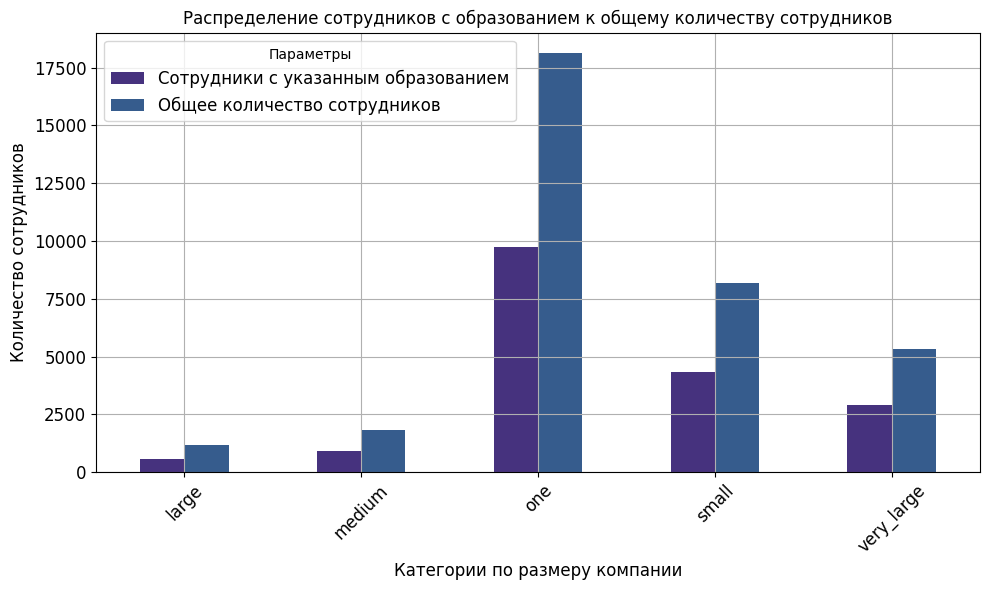

In [51]:
df = share_grouped.drop(columns=['share_educated'])
# Построение графика
df.plot(kind='bar', figsize=(10, 6))

# Настройки графика
plt.title("Распределение сотрудников с образованием к общему количеству сотрудников")
plt.xlabel("Категории по размеру компании")
plt.ylabel("Количество сотрудников")
plt.xticks(rotation=45)
plt.legend(['Сотрудники с указанным образованием', 'Общее количество сотрудников'],title="Параметры")
plt.tight_layout()
plt.grid()
# Показать график
plt.show()


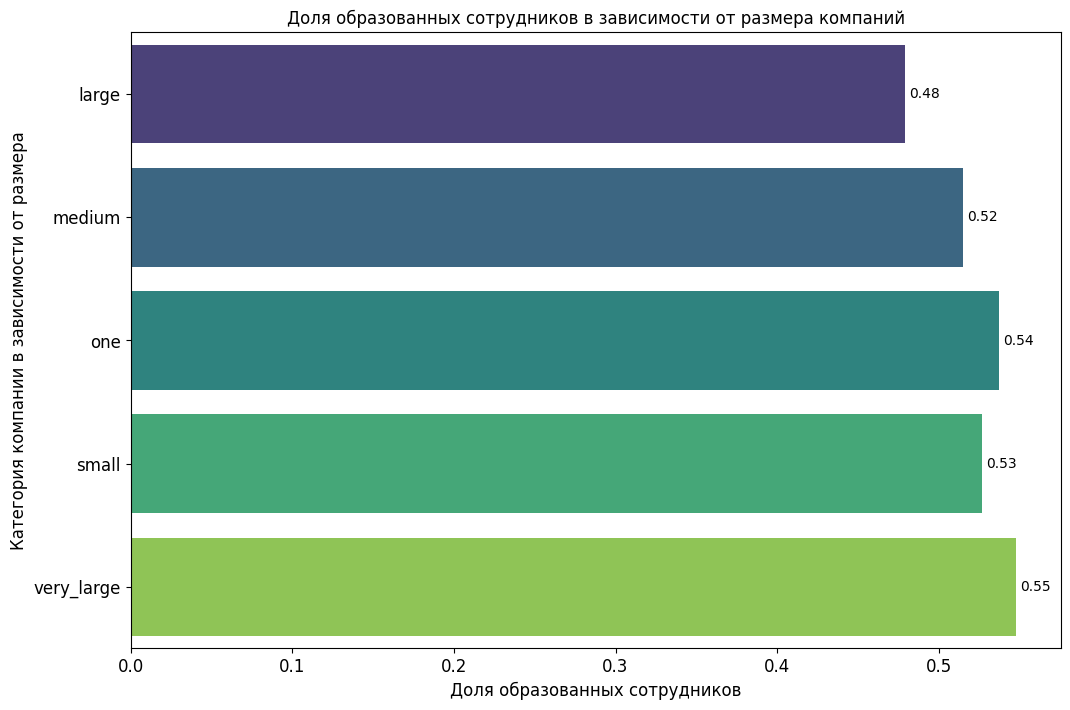

In [52]:
ax = sns.barplot(data=share_grouped,
            x='share_educated',
            y='category',
            palette='viridis')
plt.title("Доля образованных сотрудников в зависимости от размера компаний")
plt.xlabel("Доля образованных сотрудников")
plt.ylabel("Категория компании в зависимости от размера")
for container in ax.containers:
    ax.bar_label(container, label_type="edge", padding=3, fmt='%.2f')
plt.show()

**Вывод по исследованию:**

Корреляция между наличием информации об образовании работников и размером компании действительно есть, но она нелинейна. В компаниях с одним сотрудником 54% с указанным образованием. В компаниях с низким количеством работников примерно 53% из них указывают данные об образовании. В компаниях со средним количеством - 52%, выше среднего - 48%. В компаниях с высоким количеством работников 55% работников имеют данные об образовании. Таким образом, количество сотрудников с указанным образованием немного снижается с ростом компании, но возрастает в очень больших организациях.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

**Решение:**

Столбец `network_username` встречается в датафреймах `company_df` (ник компании в сети), `fund_df` (ник фонда в сети), `people_df` (ник сотрудника в сети). Последний датафрейм можно сразу исключить из анализа, поскольку нас интересуют ники компаний, а не сотрудников. А вот датафреймы company_df и fund_df проверим на совместимость. Для этого сравним столбцы на количество уникальных совпадающих значений.

In [53]:
# Приводим столбцы к нижнему регистру
company_df['network_username'] = company_df['network_username'].str.lower()
fund_df['network_username'] = fund_df['network_username'].str.lower()
# Фильтруем строки, чтобы увидеть совпадения
dif = company_df[company_df['network_username'].isin(fund_df['network_username'])]
# Выводим результат, удаляя пропуски
display(dif['network_username'].dropna())

171        thomsonreuters
3307        ingramcontent
4201              corning
4202       teconnectivity
4984              chevron
               ...       
213039       jumpstartinc
213040       jumpstartinc
213752            boonseo
214797           procloud
215488    junipernetworks
Name: network_username, Length: 107, dtype: object

**Итого** получаем 107 строк совпадений по столбцу network_username. Зная, что изначальное количество строк в этом столбце в датафрейме company_df 95534 и в fund_df 2149, можно считать, что совпадение незначительно. Объединять датафреймы по этим столбцам нельзя.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

По задачам проекта нам нужно исследовать только те компании, в которых были инвестиции. По структуре датасета видно, что данные о финансировании компаний представляют собой отельный датасет, к которому позже были добавлены данные о самих компаниях. Выделим только те строки, где хранится интересующая нас информация и удалим дублирующийся столбец company_id.

In [54]:
# Чистим датасет от пропусков в id и name компании
company_df = company_df.dropna(subset=['company_id']).copy()
company_df = company_df.dropna(subset=['name']).copy()

In [55]:
# # Удаляем столбец с дубликатом id
# company_df_fun = company_df_fun.drop('company_id_f', axis=1)


Теперь сгруппируем данные по компаниям, для числовых столбцов считая сумму, а для строковых и категориальных - вставляя первую запись, поскольку они дублируются. Для дат добавим последнюю запись тоже.

In [56]:
# объединяем данные по id компании
company_df_fun = company_df.groupby('company_id').agg({
    'name':'first',
    'category_code':'first',
    'status':'first',
    'founded_at':'first',
    'closed_at':'first',
    'domain':'first',
    'network_username':'first',
    'country_code':'first',
    'investment_rounds':'first',
    'funding_rounds':'first',
    'funding_total':'first',
    'milestones':'first',
    'funded_at': ['first','last'],
    'raised_amount':'sum',
    'pre_money_valuation':'first',
    'participants':'mean',
    'is_first_round': ['first','last'],
    'funded_at_years': ['first', 'last']
})

In [57]:
# Переименуем столбцы для дальнейшей работы
company_df_fun.columns = [
    'name',
    'category_code',
    'status',
    'founded_at',
    'closed_at',
    'domain',
    'network_username',
    'country_code',
    'investment_rounds',
    'funding_rounds',
    'funding_total',
    'milestones',
    'funded_at_first',
    'funded_at_last',
    'raised_amount',
    'pre_money_valuation',
    'participants',
    'is_first_round_first',
    'is_first_round_last',
    'funded_at_years_first',
    'funded_at_years_last'
]
company_df_fun = company_df_fun.reset_index()
company_df_fun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196552 entries, 0 to 196551
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   company_id             196552 non-null  float32       
 1   name                   196552 non-null  object        
 2   category_code          123186 non-null  object        
 3   status                 196552 non-null  object        
 4   founded_at             91226 non-null   datetime64[ns]
 5   closed_at              2619 non-null    datetime64[ns]
 6   domain                 126545 non-null  object        
 7   network_username       80591 non-null   object        
 8   country_code           87990 non-null   object        
 9   investment_rounds      196552 non-null  float32       
 10  funding_rounds         196552 non-null  float32       
 11  funding_total          196552 non-null  float64       
 12  milestones             196552 non-null  floa

Датасет для дальнейшей работы готов. Все компании содержат одну строку, а вся информация была распределена по столбцам.


## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

In [58]:
# Применяем фильтрацию к датасету
company_df_fun = company_df_fun[(company_df_fun['funding_rounds'] > 0)
                                | (company_df_fun['investment_rounds'] > 0)
                                | (company_df_fun['status'] == 'acquired')]
company_df_fun.reset_index()
company_df_fun.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40747 entries, 0 to 196551
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   company_id             40747 non-null  float32       
 1   name                   40747 non-null  object        
 2   category_code          35315 non-null  object        
 3   status                 40747 non-null  object        
 4   founded_at             27807 non-null  datetime64[ns]
 5   closed_at              2128 non-null   datetime64[ns]
 6   domain                 35754 non-null  object        
 7   network_username       20850 non-null  object        
 8   country_code           34742 non-null  object        
 9   investment_rounds      40747 non-null  float32       
 10  funding_rounds         40747 non-null  float32       
 11  funding_total          40747 non-null  float64       
 12  milestones             40747 non-null  float32       
 13  funde

Базовый датасет со всеми компаниями готов. Объединим его с датасетом acq_df, где содержатся данные о покупках компаний, по столбцу acquired_company_id, поскольку нас интересует информация о покупаемых компаниях, а не покупающих.

In [59]:
#  Объединим датасеты company_df_fun и acq_df
acquired_companies = pd.merge(company_df_fun,
                              acq_df,
                              how='left',
                              left_on='company_id',
                              right_on='acquired_company_id')


In [60]:
# Проводим автоматический осмотр данных
lookup_datasets([acquired_companies])

----------       df_1       ----------


,Тип данных колонки,Тип значения,Пропущено (%),Первая строка,Строка с минимум NaN,Последняя строка
company_id,float32,<class 'numpy.float32'>,0.00%,1.00,465.00,286215.00
name,object,<class 'str'>,0.00%,Wetpaint,Brightkite,The Betty Mills Company
category_code,object,<class 'str'>,13.34%,web,social,ecommerce
status,object,<class 'str'>,0.00%,operating,acquired,operating
founded_at,datetime64[ns],<class 'pandas._libs.tslibs.timestamps.Timestamp'>,31.74%,2005-10-17 00:00:00,2007-01-01 00:00:00,
closed_at,datetime64[ns],<class 'pandas._libs.tslibs.timestamps.Timestamp'>,94.80%,,2011-12-01 00:00:00,
domain,object,<class 'str'>,12.25%,wetpaint-inc.com,brightkite.com,bettymills.com
network_username,object,<class 'str'>,48.79%,bachelrwetpaint,brightkite,
country_code,object,<class 'str'>,14.75%,USA,USA,USA
investment_rounds,float32,<class 'numpy.float32'>,0.00%,0.00,0.00,0.00


In [61]:
acquired_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40890 entries, 0 to 40889
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   company_id             40890 non-null  float32       
 1   name                   40890 non-null  object        
 2   category_code          35436 non-null  object        
 3   status                 40890 non-null  object        
 4   founded_at             27911 non-null  datetime64[ns]
 5   closed_at              2128 non-null   datetime64[ns]
 6   domain                 35883 non-null  object        
 7   network_username       20938 non-null  object        
 8   country_code           34858 non-null  object        
 9   investment_rounds      40890 non-null  float32       
 10  funding_rounds         40890 non-null  float32       
 11  funding_total          40890 non-null  float64       
 12  milestones             40890 non-null  float32       
 13  f

Получившийся датасет имеет 40890 строк и 28 столбцов. Пропуски имеются  во всех столбцах приединенного датасета acq_df, больше всего в столбце term_code - 95%, в остальных столбцах здесь по 77% пропусков. Информация неполная, нужно иметь это ввиду при анализе.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

**Решение:**

Для начала оценим данные методом describe, чтобы понять общюю картину. Далее Посмотрим гистограмму и диаграмму размаха.

In [62]:
# Фильтруем данные, чтобы не вошли нули
filtered = acquired_companies[acquired_companies['funding_total'] > 0]

# Смотрим общее описание данных
filtered['funding_total'].describe()

count        27918.00
mean      14845050.13
std       67758758.60
min            291.00
25%         500000.00
50%        2573200.00
75%       11000000.00
max     5700000000.00
Name: funding_total, dtype: float64

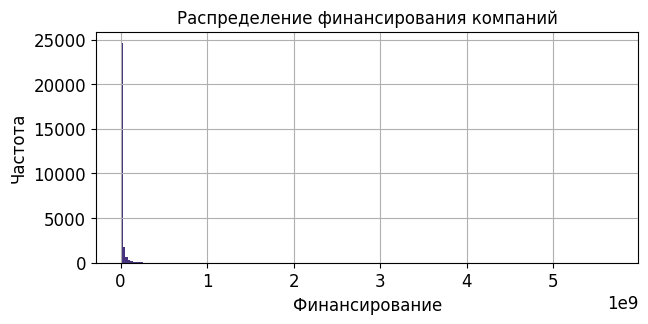

In [63]:
# Фильтруем данные, чтобы не вошли нули
filtered = acquired_companies[acquired_companies['funding_total'] > 0]

# Строим гистограмму
plt.figure(figsize=(7, 3))
filtered['funding_total'].plot(kind='hist',
                               bins=200)
plt.title('Распределение финансирования компаний')
plt.xlabel('Финансирование')
plt.ylabel('Частота')
plt.grid()
plt.show()

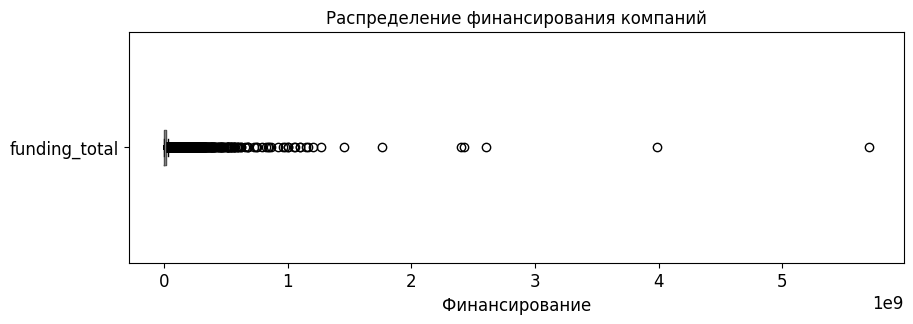

In [64]:
# Строим диаграмму размаха
plt.figure(figsize=(10, 3))
filtered.boxplot(column='funding_total', vert=False)
plt.title('Распределение финансирования компаний')
plt.xlabel('Финансирование')
plt.grid()
plt.show()

В данных присутствуют очень большие выбросы, что сильно искажает картину. Максимальная цифра финансирования 5 млрд. 700 тыс. долларов. Минимальная - 291 доллар. Большая часть данных находится в диапазоне между 500 тыс. и 11 млн. При этом здесь нельзя сказать об аномальных значениях как об ошибке. Просто в данных присутствуют как очень низкие, так и очень высокие цифры финансирования. Типичное описание для данных тут не подходит.

Нам нужно вычислить типичные данные и выбросы, поэтому для удобства и чтобы немного ограничить выбросы снимем верхнюю границу данных до 90%, а нижнюю - до 1%. На получившемся отрезке посчитаем типичный размер финансирования.

In [65]:
# Используем процентили
lower_bound = filtered['funding_total'].quantile(0.01)
upper_bound = filtered['funding_total'].quantile(0.90)

# Фильтрация
typical_data = filtered[(filtered['funding_total'] >= lower_bound)
                        & (filtered['funding_total'] <= upper_bound)]

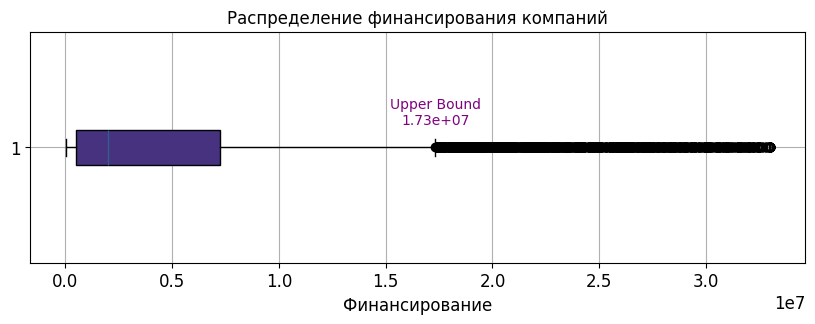

In [66]:

# Строим диаграмму размаха по отфильтрованным данным
fig, ax = plt.subplots(figsize=(10, 3))
boxplot = ax.boxplot(typical_data['funding_total'], vert=False, patch_artist=True)
# Расчет границ выбросов
q3 = typical_data['funding_total'].quantile(0.75)
q1 = typical_data['funding_total'].quantile(0.25)
upper_bound = q3 + 1.5 * (q3 - q1)
# Подписи на графике
ax.text(upper_bound, 1.1, f'Upper Bound\n{upper_bound:.2e}', ha='center', color='purple')
plt.title('Распределение финансирования компаний')
plt.xlabel('Финансирование')
plt.grid()
plt.show()


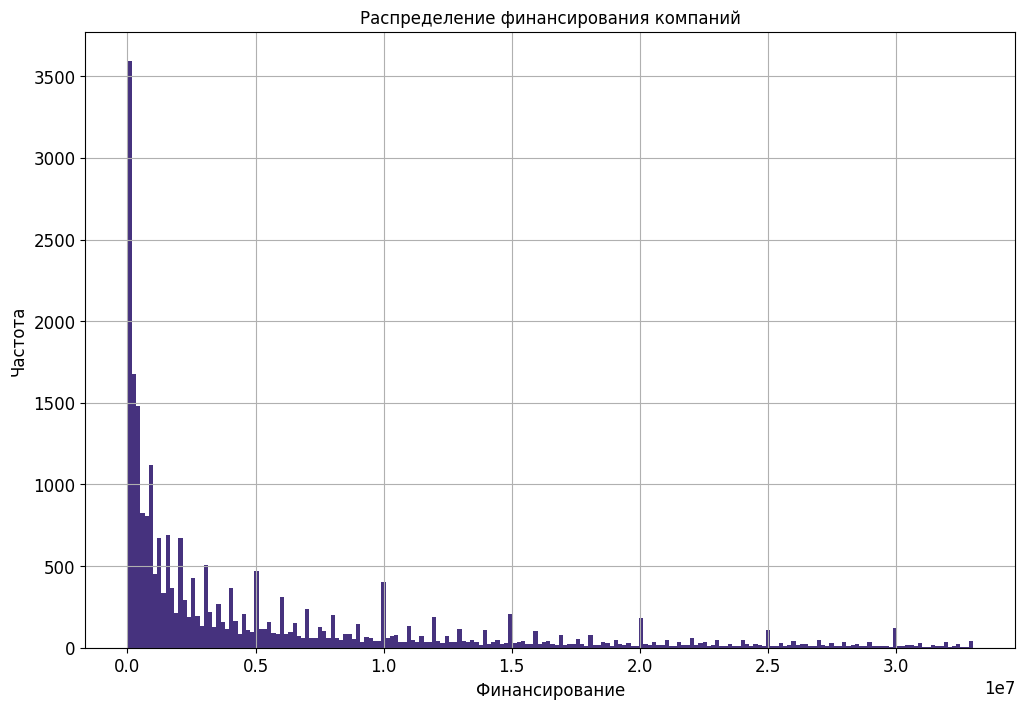

In [67]:
# Строим гистограмму
typical_data['funding_total'].plot(kind='hist',
                               bins=200)
plt.title('Распределение финансирования компаний')
plt.xlabel('Финансирование')
plt.ylabel('Частота')
plt.grid()
plt.show()

In [68]:
typical_data['funding_total'].describe()

count      24853.00
mean     5340321.82
std      7281884.26
min        11700.00
25%       500000.00
50%      2000000.00
75%      7228700.00
max     33000000.00
Name: funding_total, dtype: float64

**Итого:**

По отфильтрованным данным становится видно, что выбросы по верхней границе начинаются примерно с порога в 17 млн. 300 тыс. долларов. При этом выбросов очень много, что указывает на сильное смещение распределения вправо. Большая часть данных находится в диапазоне между 500 тыс. и 7 млн. 300 тыс. долларов. Медиана финансирования одной компании 2 млн. то есть половина компаний получила финансирование меньше этой суммы. Примерно 3500 компаний имеют финансирование от 0 до 1 млн. - это самая частая группа. Также присутствуют скачки по количеству финансирования на границах с круглыми цифрами в 5 млн., 10 млн., 15 млн. и так далее вполть до 30 млн. долларов.


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

**Решение:**

Сначала отфильтруем датасет по нашим критериям, чтобы изучить такие компании.

In [69]:
# Фильтруем датасет
filtered = acquired_companies[((acquired_companies['price_amount'] == 0)
                              | (acquired_companies['price_amount'] == 1))
                              & (acquired_companies['funding_total'] > 0)]

In [70]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1618 entries, 5 to 38501
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   company_id             1618 non-null   float32       
 1   name                   1618 non-null   object        
 2   category_code          1553 non-null   object        
 3   status                 1618 non-null   object        
 4   founded_at             1285 non-null   datetime64[ns]
 5   closed_at              13 non-null     datetime64[ns]
 6   domain                 1546 non-null   object        
 7   network_username       812 non-null    object        
 8   country_code           1536 non-null   object        
 9   investment_rounds      1618 non-null   float32       
 10  funding_rounds         1618 non-null   float32       
 11  funding_total          1618 non-null   float64       
 12  milestones             1618 non-null   float32       
 13  funded_

In [71]:
display(filtered['company_id'].nunique())
display(filtered['company_id'].nunique() / company_df_fun['company_id'].nunique())

1593

0.03909490269222274

Итого 1593 компаний, в которых сумма покупки 0 или 1 доллар и имеющих финансирование больше нуля, что составляет 3% от общего числа купленных компаний.


Проверим зависимость от стран и категорий.

In [72]:
# Проверяем распределение компаний по категориям
category_com = filtered.groupby('category_code')['company_id']\
    .nunique()\
        .sort_values(ascending=True)
display(category_com.tail(5))

# Проверяем распределение компаний по странам
country_com = filtered.groupby('country_code')['company_id']\
    .nunique()\
        .sort_values(ascending=True)
display(country_com.tail(5))

category_code
advertising     75
mobile         116
enterprise     128
web            208
software       360
Name: company_id, dtype: int64

country_code
ISR      27
DEU      31
CAN      46
GBR      64
USA    1215
Name: company_id, dtype: int64

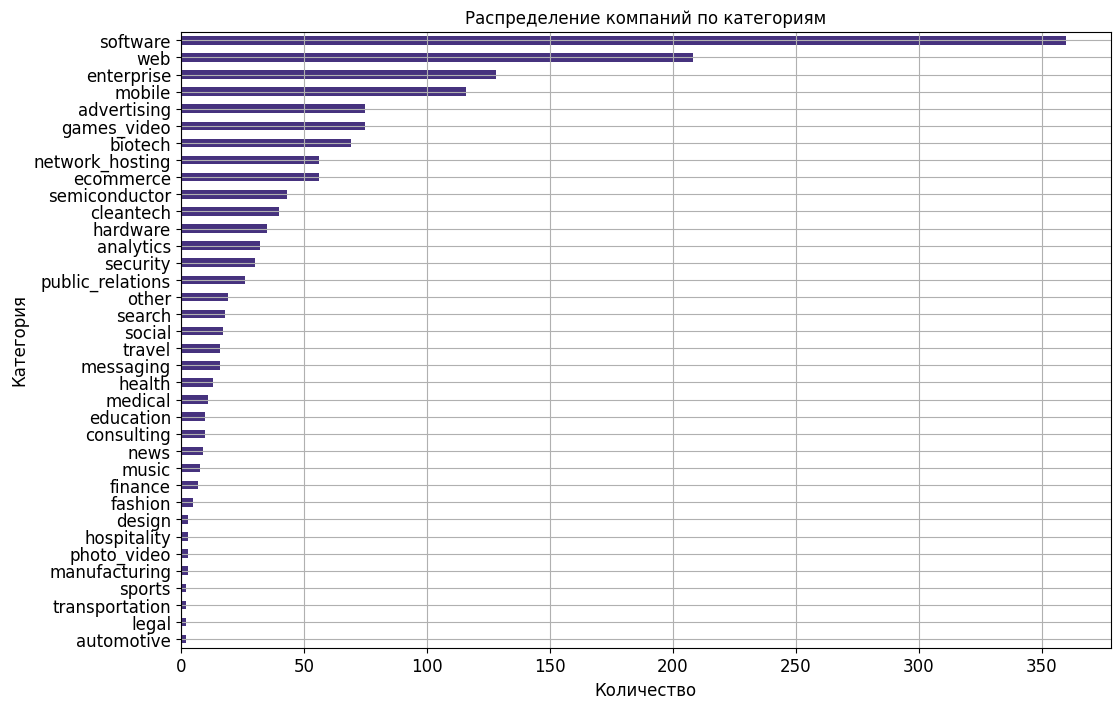

In [73]:
# Графически оторазим распределение компаний по категориям
category_com.plot.barh(stacked=True, x='company_id', y='category_code')
plt.title('Распределение компаний по категориям')
plt.xlabel('Количество')
plt.ylabel('Категория')
plt.grid()
plt.show()

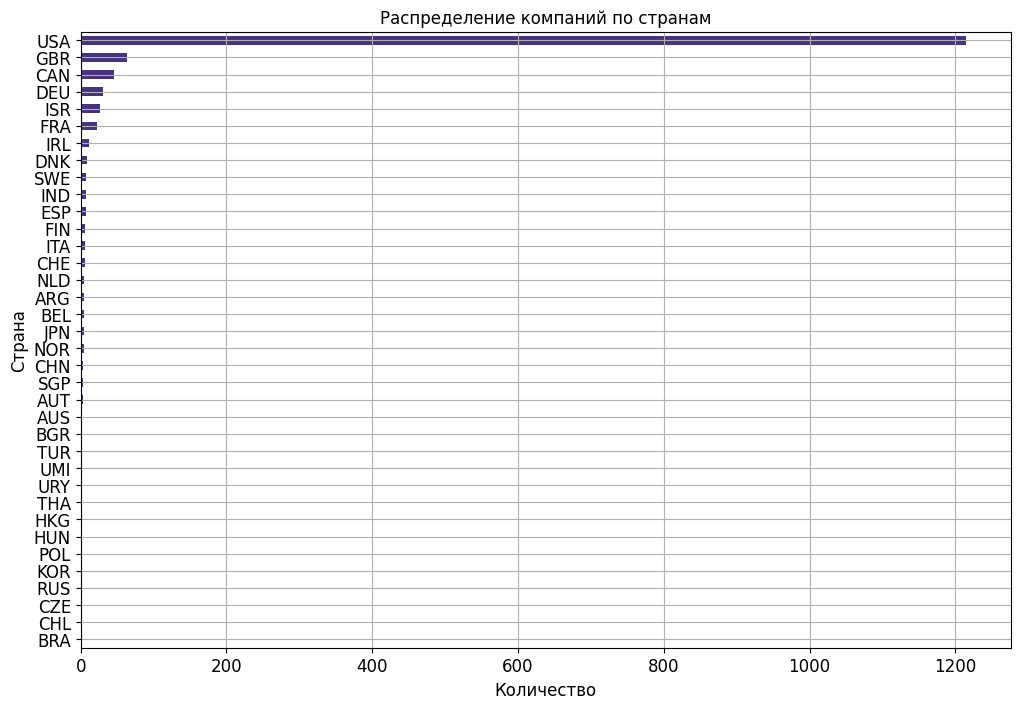

In [74]:
# Графически оторазим распределение компаний по странам
country_com.plot.barh(stacked=True, x='company_id', y='country_code')
plt.title('Распределение компаний по странам')
plt.xlabel('Количество')
plt.ylabel('Страна')
plt.grid()
plt.show()

В подавляющем большинстве случаев исследуемые компании находятся в США. 

Также чаще всего исследуемые компании относятся к категориям software (более 350), web (208), enterprise (128), mobile (116). 

Теперь внимательнее посмотрим на распределение данных суммы финансирования таких компаний.

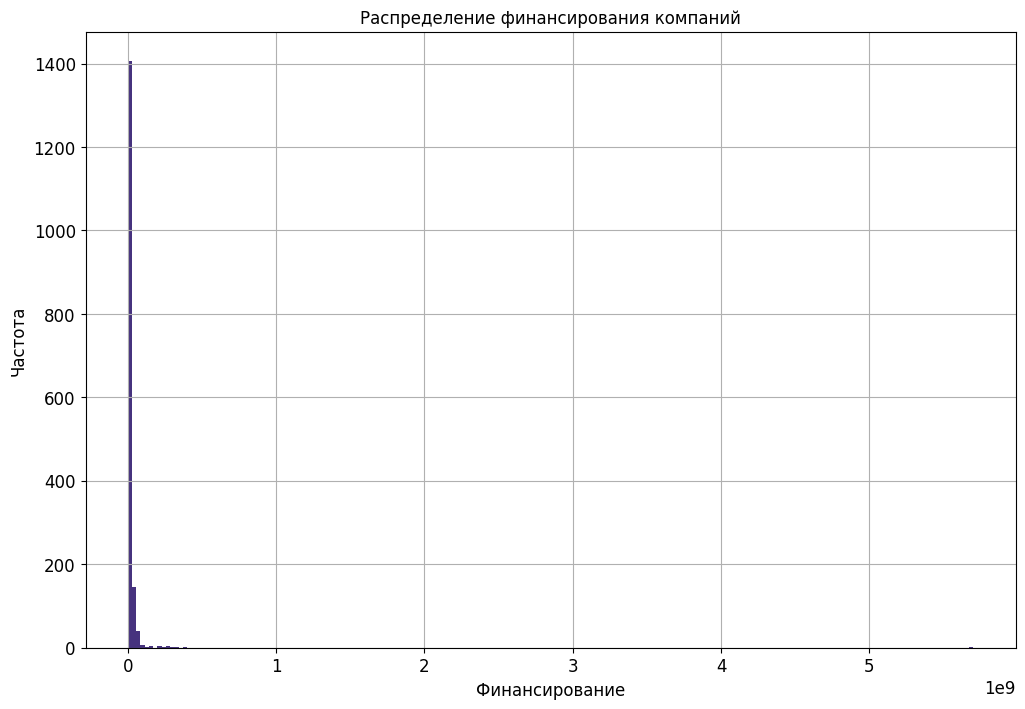

In [75]:
# Строим гистограмму
filtered['funding_total'].plot(kind='hist',
                               bins=200)
plt.title('Распределение финансирования компаний')
plt.xlabel('Финансирование')
plt.ylabel('Частота')
plt.grid()
plt.show()

In [76]:
filtered['funding_total'].describe()

count         1618.00
mean      18152961.94
std      144503027.47
min           3750.00
25%        2000000.00
50%        6000000.00
75%       15500000.00
max     5700000000.00
Name: funding_total, dtype: float64

Распределение имеет огромные выбросы и сильное смещение распределения вправо. Тогда как большая часть значений сосредоточена на сумме до 1 млн., максимальное значения финансирования здесь - 5 млрд. 700 млн.  Медиана намного ниже среднего значения, среднее отклонение составляет 144,5 млн.

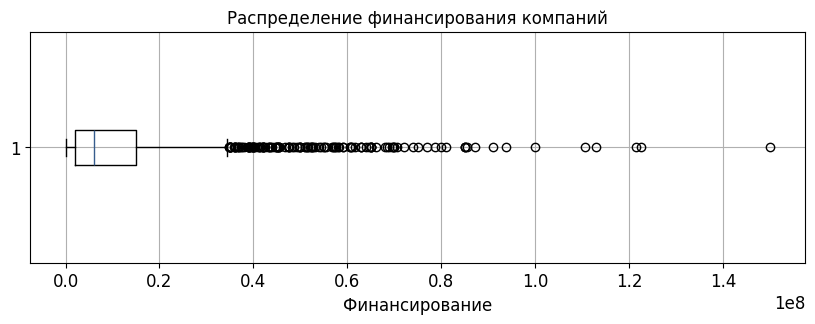

In [77]:
# Для более ясной картины немного сузим диапазон данных
upper_bound = filtered['funding_total'].quantile(0.99)
data = filtered[filtered['funding_total'] < upper_bound]

# Строим диаграмму размаха
plt.figure(figsize=(10, 3))
plt.boxplot(data['funding_total'], vert=False)
plt.title('Распределение финансирования компаний')
plt.xlabel('Финансирование')
plt.grid()
plt.show()

In [78]:
# посчитаем верхнюю и нижнюю границу выбросов
q1 = filtered['funding_total'].quantile(0.25)
q3 = filtered['funding_total'].quantile(0.75)
upper_bound = q3 + 1.5 * (q3 - q1)
lower_bound = q1 - 1.5 * (q3 - q1)
display(upper_bound)
display(lower_bound)

np.float64(35750000.0)

np.float64(-18250000.0)

In [79]:
# Посчитаем количество компаний, находящихся 
# за пределами стандартной границы выбросов
fil = filtered[filtered['funding_total'] > upper_bound]
display(fil['company_id'].nunique())
display(round(fil['company_id'].nunique() / filtered['company_id'].nunique(), 2))

143

0.09

Компаний, которые можно считать выбросами, пользуясь стандартной методикой, 143 штуки. Это 9% от общего числа, что достаточно много, чтобы их просто отбросить. Здесь стандартная методика расчета выбросов не подходит. Данные слишком неоднородны.

Разделим компании на категории по размеру финансирования, чтобы посмотреть их взаимосвязь.

In [80]:
# Создаем новый столбец с категориями
filtered['category'] = pd.qcut(filtered['funding_total'],
                               q=4,
                               labels=['low', 'middle', 'upper_middle', 'high'])

In [81]:
# Строим сводную таблицу по категориям финансирования
pivot_category = pd.pivot_table(
    filtered,
    index='category',
    aggfunc={'company_id':'nunique',
             'funding_total':'mean',
             'investment_rounds':'mean',
             'funding_rounds':'mean',
             'milestones':'mean'}
)
pivot_category

,company_id,funding_rounds,funding_total,investment_rounds,milestones
category,,,,,
low,414,1.40,895684.48,0.00,1.48
middle,385,1.56,3914437.02,0.01,1.39
upper_middle,400,1.78,10316300.97,0.00,1.31
high,394,2.84,57847227.30,0.02,1.64


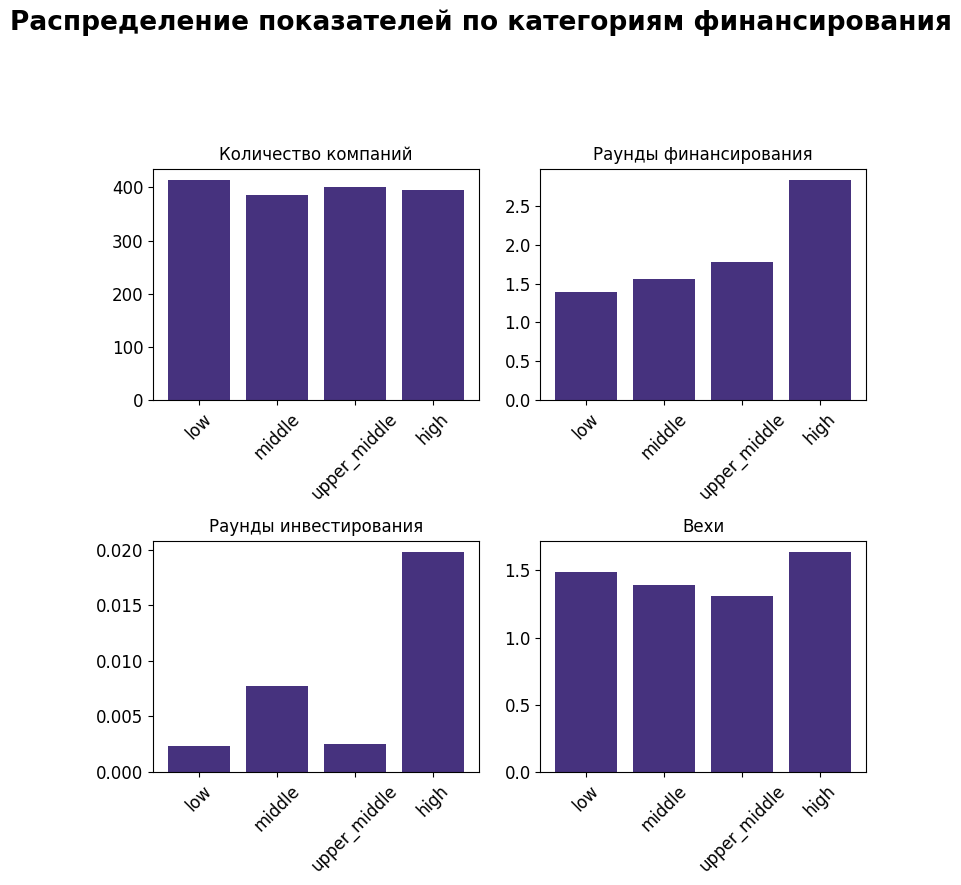

In [82]:
# Строим графики на основе таблицы
pivot_category = pivot_category.reset_index()

plt.figure(figsize=[8,8])

plt.suptitle('Распределение показателей по категориям финансирования', y=1.1, fontsize=19, fontweight='bold')
plt.subplot(2, 2, 1)
plt.bar(pivot_category['category'], pivot_category['company_id'])
plt.title('Количество компаний')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(pivot_category['category'], pivot_category['funding_rounds'])
plt.title('Раунды финансирования')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.bar(pivot_category['category'], pivot_category['investment_rounds'])
plt.title('Раунды инвестирования')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.bar(pivot_category['category'], pivot_category['milestones'])
plt.title('Вехи')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

**Выводы по сводной таблице:**

- Количество раундов финансирования напрямую зависит от общего финансирования компании, то есть более финансируемые компании дольше держатся в этапах финансирования.
- Раунды инвестирования в другие компании резко возрастают с ростом общего финансирования компании. Большие компании чаще инвестируют, а то время как компании с финансированием выше среднего и с низким финансированием вообще не инвестируют. В компаниях со средним финансированием тоже присутствует инвестирование.
- Вехи компаний с высоким финансированием чуть больше, то есть они существуют чуть дольше остальных компаний, в то время как компании с финансированием выше среднего имеют самое низкое среднее количество вех.

In [83]:
# Создаем матрицу корреляции
cor_matrix = filtered[['category_code', 
                       'founded_at',
                       'country_code',
                       'investment_rounds',
                       'funding_rounds',
                       'funding_total',
                       'acquired_at']].phik_matrix()

data_heatmap = cor_matrix.loc[cor_matrix.index != 'funding_total']['funding_total']\
    .sort_values(ascending=False)

data_heatmap = pd.DataFrame(data_heatmap, columns=['funding_total'])


interval columns not set, guessing: ['investment_rounds', 'funding_rounds', 'funding_total']


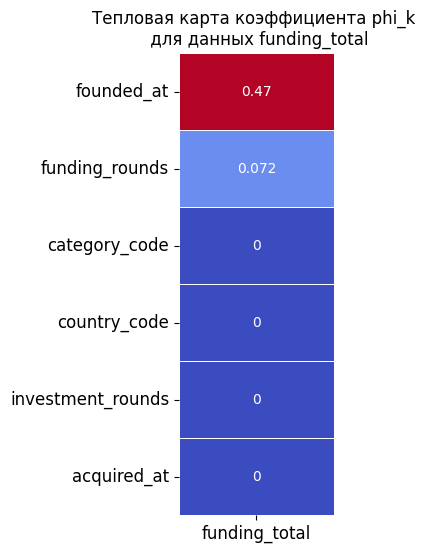

In [84]:
# Построим тепловую карту по данным корреляции
plt.figure(figsize=(2, 6))
sns.heatmap(data_heatmap,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            cbar=False)

plt.title('Тепловая карта коэффициента phi_k \n для данных funding_total')
plt.show()

**Выводы о корреляции:**

- Сильная положительная корреляция с funded_at_last говорит о том, что год финансировая - важный фактор в формировании суммы финансирования.
- Умеренная корреляция с founded_at говорит о том, что более молодые компании могут быть более интересны для инвестирования среди таких компаний.
- Отсутствует связь между количеством финансирования и страной, категорией, раундами инвестиций в другие компании и датой покупки.

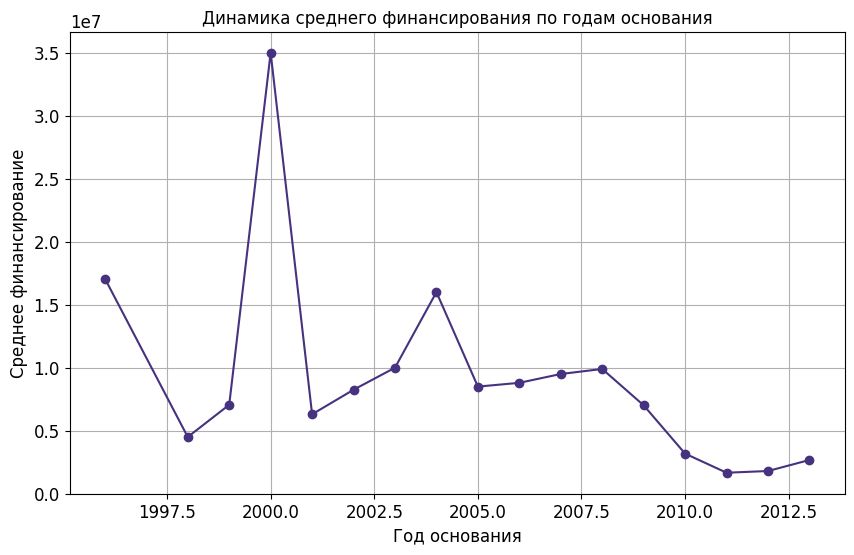

In [85]:
filtered['funding_year'] = filtered['funded_at_first'].dt.year
# График зависимости funding_total от funded_at_years_first
yearly_funding = filtered.groupby('funding_year')['funding_total'].median()
plt.figure(figsize=(10, 6))
plt.plot(yearly_funding.index, yearly_funding.values, marker='o', linestyle='-')

plt.title("Динамика среднего финансирования по годам основания")
plt.xlabel("Год основания")
plt.ylabel("Среднее финансирование")
plt.grid(True)


plt.show()


**Общие выводы по исследованию:**

- Всего компаний, проданных за 0 или 1 доллар, 1593 штуки. Большая часть из них находится в США и имеет категории software, web, enterprise.
- Согласно исследованным данным, измерять выбросы по стандартной методике в данном случае не имеет смысла, поскольку выбросы в таком случае включают 9% всех компаний, то есть процентиль верхней границы соответствует 91%.
- Компании с высоким финансированием имеют больше раундов финансирования, чаще инвестируют в другие компании и дольше существуют, что все равно не мешает таким компаниям продаваться за символическую сумму.
- Была исследована корреляция между средним количеством финансирования таких компаний и годом финансирования. Исследование показало, что пик финансирования пришелся на 2000 год (пузырь-дотком, после чего многие компании оказались нерентабельными, что может объяснить их покупку за символическую сумму), а самые низкие показатели пришлись на 2011 год, что возможно стало последствием кризиса 2008 года и снижения уровня доверия инвесторов. 



### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

**Решение:**

Для начала посмотрим показатели столбца с ценами.

In [86]:
# Посмотрим основные показатели в столбце с ценами
acquired_companies['price_amount'].describe()

count            9390.00
mean        393988145.31
std       26846244613.76
min                 0.00
25%                 0.00
50%                 0.00
75%             23625.50
max     2600000000000.00
Name: price_amount, dtype: float64

Разброс очень велик, а максимальная сумма гораздо выше, чем 75% показателей в этом столбце.

Для разделения столбца на категории используем метод qcut.

In [87]:
# Сначала удалим из выборки все компании с нулями
filtered = acquired_companies[acquired_companies['price_amount'] > 0]
# Разделим данные на категории
filtered['category_price'] = pd.qcut(filtered['price_amount'], 
                                     4,
                                     labels=['low', 'middle', 'upper_middle', 'upper'])


Создадим датасет категорий стартапов с расчяитанными соотношениями категорий цен и дисперсией, которая используется как стандартный показатель разброса цен.

In [88]:
# Группируем датасет по категориям для подсчета категорий цены
category_1 = filtered.groupby('category_code')['category_price']\
    .value_counts(normalize=True)\
        .sort_values(ascending=False)\
            .reset_index()
category_1.columns = ['category_code', 'category_price', 'proportion']

# Фильтруем датасет по категориям для подсчета дисперсии
category_2 = filtered.groupby('category_code').agg({'funding_total':'var'})\
    .sort_values(by='funding_total', ascending=False).reset_index()
category_2.columns = ['category_code', 'funding_total_var']

# Объединяем два получившихся датасета
category = category_1.merge(category_2,
                            how='inner',
                            on='category_code')

# Фильтруем датасет по категории цен
category = category[category['category_price'] == 'upper']

# Сортируем по дисперсии
category = category.sort_values(by=['funding_total_var'], ascending=False).reset_index()

# Фильтруем по доле категорий с высокими ценами
top = category[category['proportion'] > 0.30].head(10).reset_index()
top

,level_0,index,category_code,category_price,proportion,funding_total_var
0,0,21,cleantech,upper,0.41,32262851443449048.00
1,3,24,finance,upper,0.40,1958050246140510.75
2,5,19,biotech,upper,0.42,1649434795575781.50
3,6,38,transportation,upper,0.33,1496333333333333.50
4,10,42,network_hosting,upper,0.33,784878373827041.25
5,13,13,medical,upper,0.50,569155833333333.25
6,14,40,fashion,upper,0.33,560333333333333.38
7,17,43,public_relations,upper,0.32,376912065012957.88
8,19,3,automotive,upper,0.67,280913633333333.34
9,24,26,security,upper,0.39,227475206895873.00


Text(0.5, 1.0, 'Дисперсия цен в категории стартапа')

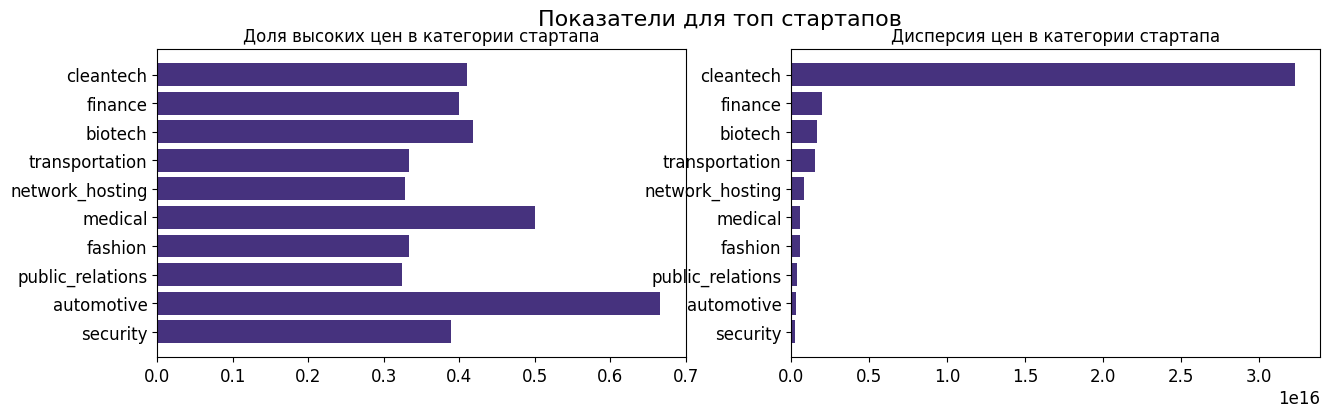

In [89]:
# Строим линейчатые диаграммы для получившегося датасета
plt.figure(figsize=[15,4])
plt.suptitle('Показатели для топ стартапов')
top = top.sort_values(by='funding_total_var', ascending=True)

plt.subplot(1,2,1)
plt.barh(top['category_code'], top['proportion'])
plt.title('Доля высоких цен в категории стартапа')

plt.subplot(1,2,2)
plt.barh(top['category_code'], top['funding_total_var'])
plt.title('Дисперсия цен в категории стартапа')

**Вывод:**

Были отобраны категории компаний, обладающие наибольшими ценами и наибольшим разбросом цен. Для определения среднего уровня цен были использованы созданные категории цен, и отобранные категории имеют более 30% компаний с высоким уровнем цены, что и повлияло на итоговое количество категорий. Для определения разброса цен внутри категории была использована дисперсия.

По результатам исследования абсолютный топ по дисперсии, соответственно по разбросу цен, - это категория cleantech. Далее с огромным отрывом идут категории finance, biotecht. У перечисленных компаний в среднем более 40% от общего числа составляют компании с высокими ценами. Больше всего доля компаний с высокими ценами в категории automotive (0.67) и medical (0.50).


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

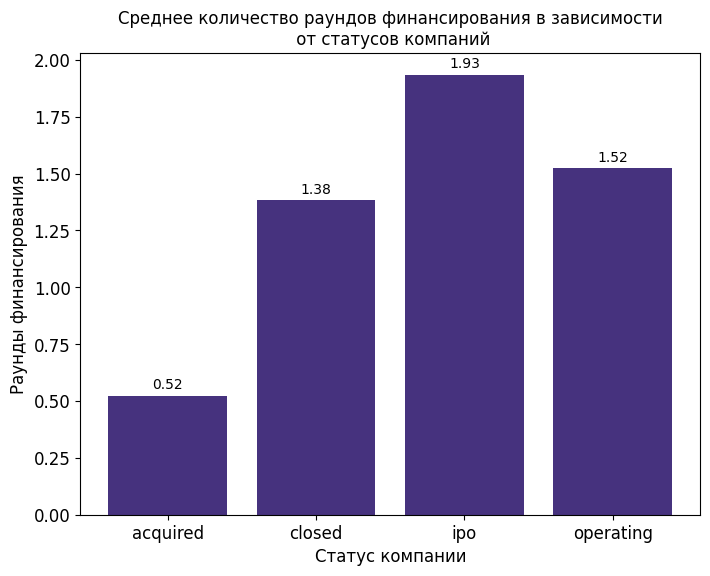

In [90]:
plt.figure(figsize=(8,6))
grouped = company_df_fun.groupby('status')['funding_rounds'].mean().reset_index()
ax = plt.bar(grouped['status'], grouped['funding_rounds'])
plt.title('Среднее количество раундов финансирования в зависимости\n от статусов компаний')
plt.xlabel("Статус компании")
plt.ylabel("Раунды финансирования")
plt.gca().bar_label(ax, fmt='%.2f', padding=3)
plt.show()

**Выводы:**

- Компании с IPO имеют наибольшее среднее количество раундов финансирования - 1.93, что логично, поскольку для выхода на IPO требуется пройти несколько этапов привлечения капитала. Такой статус компании является индикатором зрелости компании.
- Компании в статусе operating занимают второе место по среднему количеству раундов (1.52). Это развивающиеся компании, еще не достигшие статуса IPO. 
- Закрытые компании (closed) в среднем имеют 1.38 раундов финансирования. Это говорит о том, что они прекращают свою деятельность на ранних этапах развития, не успев привлечь много финансирования.
- Приобретенные компании (acquired) имеют самое низкое среднее количество раундов финансирования - 0.52. Это может быть связано с тем, что они часто покупались на ранних стадиях развития, то есть это стартапы, до получения значительного финансирования. Инвесторы и другие бизнесы выкупают потенциально известные компании на ранних этапах.


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

1. Была проведена предобработка всех датасетов. Изменены названия столбцов, проанализированы пропуски, изменены типы данных там, где это необходимо.
2. Было проведено предварительное исследование данных. На этом этапе мы ознакомились с распределением финансирования по годам, узнали о количестве образованных сотрудников в компниях, проанализировали датасеты на возможность объединения по столбцу network_username и привели датасет с общими данными по компаниям к более сокращенному и информативному виду, чтобы подготовить его к дальнейшему анализу.
3. Было проведено объединение датасетов для общей информации о компаниях и инвестициях в них. Далее был проведен анализ выбросов в данных о суммах финансирования, исследованы компании, купленных за символическую цену, исследованы категории стартапов и цены в них, а также был исследован показатель раундов финансирования в разрезе статусов компании.

**Выводы:**

- Анализ данных о финансируемых суммах показал, что в данных присутствуют компании как с очень большим, так и с очень малым количеством финансирования. Большая часть компаний находится в диапазоне между 500 тыс. и 7 млн. долларов. Медиана проходит на уровне в 2 млн. Данные имеют огромные цифры выбросов в большую сторону.
- Компании, купленные за 0 и 1 доллар, существуют во всех категориях цен на финансирование, то есть перепродажа на таких условиях встречается достаточно часто вне зависимости от цены компании и количества финансирования. Согласно исследованию, пики оснований таких компаний находятся в пределах влияния мировых кризисов, и после 2010 года количество таких компаний находится на минимуме.
- Наиболее подходящие для высокорискового финансирования категории компаний: cleantech, finance, automotive. Компании в этих категориях обладают наибольшим размахом финансирования и в среднем у них выше суммы финансирования.
- По данным исследования раундов финансирования компании с IPO имеют финансирование в среднем дольше всего, а вот приобретенные компании наоборот - меньше всего, что говорит о том, что чаще всего инвесторы и другие компании выкупают молодые перспективные статапы, которые еще не успели получить много финансирования.
- Согласно исследованию информации об образовании сотрудников, количество сотрудников с указанным образованием немного снижается с ростом компании, но возрастает в очень больших организациях.